# IMPORTING:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/train.csv')
test = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')
samp = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/sample_submission_UVKGLZE.csv')

In [ ]:
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
samp.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,0,0,0
1,20974,0,0,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,0,0,0,0,0
4,20977,0,0,0,0,0,0


In [ ]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)
print('Sample shape:',samp.shape)

Train shape: (20972, 9)
Test shape: (8989, 3)
Sample shape: (8989, 7)


In [ ]:
train.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

In [ ]:
l = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

for col in l:
  print(col,':\n',train[col].value_counts())

Computer Science :
 0    12378
1     8594
Name: Computer Science, dtype: int64
Physics :
 0    14959
1     6013
Name: Physics, dtype: int64
Mathematics :
 0    15354
1     5618
Name: Mathematics, dtype: int64
Statistics :
 0    15766
1     5206
Name: Statistics, dtype: int64
Quantitative Biology :
 0    20385
1      587
Name: Quantitative Biology, dtype: int64
Quantitative Finance :
 0    20723
1      249
Name: Quantitative Finance, dtype: int64


In [ ]:
#CS :8594
#Phy :6013
#Math :5618
#Stats :5206
#QB :587
#QF :249

In [ ]:
#train
dic = {'CS' :8594,'Phy' :6013,'Math' :5618,'Stats' :5206,'QB' :587,'QF' :249}

values = dic.values()
total = sum(values)
percent_values = [value * 100. / total for value in values]
print(percent_values)

[32.71785891041992, 22.891841474092967, 21.388053451098337, 19.819545437240645, 2.234743213918605, 0.9479575132295276]


In [ ]:
#from above we can say that the data is imbalanced for last 2 features

In [ ]:
#train['combined'] = train['TITLE']+' '+train['ABSTRACT']
#test['combined'] = test['TITLE']+' '+test['ABSTRACT']

In [ ]:
test = test.drop(['ID'],axis=1)

In [ ]:
X = train.loc[:,['TITLE','ABSTRACT']]
y = train.loc[:,l]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5555, shuffle=True)

In [ ]:
#train_size = round(train.shape[0]*0.8)
#test_size = train.shape[0] - train_size
#print(train_size)
#print(test_size)

#X_train, X_test = X[:train_size], X[train_size:]
#y_train, y_test = y[:train_size], y[train_size:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(18874, 2) (2098, 2)
(18874, 6) (2098, 6)


In [ ]:
y_test.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
17273,0,1,1,0,0,0
3323,0,1,0,0,0,0
14786,0,0,1,0,0,0
2030,1,0,0,0,0,0
13741,1,0,0,0,0,0


In [ ]:
y_test.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [ ]:
y1 = np.array(y_train)
y2 = np.array(y_test)

# TEXT PREPROCESSING:

In [ ]:
#Removing Punctuations

X_train.replace('[^a-zA-Z]',' ', regex=True, inplace=True)
X_test.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

test.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

In [ ]:
#Converting to lower case characters

for index in X_train.columns:
  X_train[index] = X_train[index].str.lower()

for index in X_test.columns:
  X_test[index] = X_test[index].str.lower()

for index in test.columns:
  test[index] = test[index].str.lower()

In [ ]:
#Removing one letter words

X_train['ABSTRACT'] = X_train['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
X_test['ABSTRACT'] = X_test['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

test['ABSTRACT'] = test['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

In [ ]:
#Removing multiple blank spaces

X_train = X_train.replace('\s+', ' ', regex=True)
X_test = X_test.replace('\s+', ' ', regex=True)

test = test.replace('\s+', ' ', regex=True)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
stop_words = set(stopwords.words('english')) 
len(stop_words)
X_train['ABSTRACT'] = X_train['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
X_test['ABSTRACT'] = X_test['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [ ]:
X_train['combined'] = X_train['TITLE']+' '+X_train['ABSTRACT']
X_test['combined'] = X_test['TITLE']+' '+X_test['ABSTRACT']

test['combined'] = test['TITLE']+' '+test['ABSTRACT']

In [ ]:
X_train = X_train.drop(['TITLE','ABSTRACT'],axis=1)
X_test = X_test.drop(['TITLE','ABSTRACT'],axis=1)

test = test.drop(['TITLE','ABSTRACT'],axis=1)

In [ ]:
X_train.head()

,combined
7031,determinants of public cooperation in multiple...
6054,basis adaptive sample efficient polynomial cha...
17643,statistics of turbulence in the energy contain...
11829,strong comparison principle for the fractional...
15542,phase limitations of zames falb multipliers ph...


In [ ]:
train_lines = []
for row in range(0,X_train.shape[0]):
  train_lines.append(' '.join(str(x) for x in X_train.iloc[row,:]))

test_lines = []
for row in range(0,X_test.shape[0]):
  test_lines.append(' '.join(str(x) for x in X_test.iloc[row,:]))

predtest_lines = []
for row in range(0,test.shape[0]):
  predtest_lines.append(' '.join(str(x) for x in test.iloc[row,:]))

In [ ]:
train_lines

['determinants of public cooperation in multiplex networks synergies evolutionary game theory statistical physics significantly improved understanding public cooperation structured populations multiplex networks particular provide theoretical framework within network science allows us mathematically describe rich structure interactions characterizing human societies research shown multiplex networks may enhance resilience cooperation interplay overlap structure layers control parameters corresponding games yet investigated aim consider public goods game multiplex network unveil role number layers overlap links well impact different synergy factors different layers onset cooperation show enhanced public cooperation emerges significant edge overlap combined least one layer able sustain cooperation means sufficiently high synergy factor absence either conditions evolution cooperation multiplex networks determined bounds traditional network reciprocity enhanced resilience results caution o

In [ ]:
test_lines

['grassmannian flows and applications to nonlinear partial differential equations show solutions large class partial differential equations nonlocal riccati type nonlinearities generated corresponding linearized equations arbitrary initial data well known evolutionary matrix riccati equations generated projecting linear evolutionary flows stiefel manifold onto coordinate chart underlying grassmann manifold method relies extending idea infinite dimensional case key integral equation analogous marchenko equation integrable systems represents coodinate chart map show explicitly generate solutions scalar partial differential equations arbitrary order nonlocal quadratic nonlinearities using approach provide numerical simulations demonstrate generation solutions fisher kolmogorov petrovskii piskunov equations nonlocal nonlinearities also indicate method might extend general classes nonlinear partial differential systems',
 'improved point source detection in crowded fields using probabilisti

In [ ]:
predtest_lines

['closed form marginal likelihood in gamma poisson matrix factorization present novel understandings gamma poisson gap model probabilistic matrix factorization model count data show gap rewritten free score activation matrix gives us new insights estimation topic dictionary matrix maximum marginal likelihood estimation particular explains robustness estimator specified values factorization rank especially ability automatically prune irrelevant dictionary columns empirically observed previous work marginalization activation matrix leads turn new monte carlo expectation maximization algorithm favorable properties',
 'laboratory mid ir spectra of equilibrated and igneous meteorites searching for observables of planetesimal debris meteorites contain minerals solar system asteroids different properties like size presence water core formation provide new mid ir transmission spectra powdered meteorites obtain templates mid ir spectra asteroidal debris would look like essential interpreting mi

In [ ]:
X.head()

,TITLE,ABSTRACT
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...


In [ ]:
X.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

for index in X.columns:
  X[index] = X[index].str.lower()

X['ABSTRACT'] = X['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

#X['combined'] = X['combined'].apply(lambda x: decontracted(x))

X = X.replace('\s+', ' ', regex=True)

X['ABSTRACT'] = X['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

#X['combined'] = X['combined'].apply(get_adjectives)

X['combined'] = X['TITLE']+' '+X['ABSTRACT']


In [ ]:
X = X.drop(['TITLE','ABSTRACT'],axis=1)

In [ ]:
X.head()

,combined
0,reconstructing subject specific effect maps pr...
1,rotation invariance neural network rotation in...
2,spherical polyharmonics and poisson kernels fo...
3,a finite element approximation for the stochas...
4,comparative study of discrete wavelet transfor...


In [ ]:
X_lines = []
for row in range(0,X.shape[0]):
  X_lines.append(' '.join(str(x) for x in X.iloc[row,:]))

In [ ]:
X_lines

['reconstructing subject specific effect maps predictive models allow subject specific inference analyzing disease related alterations neuroimaging data given subject data inference made two levels global identifiying condition presence subject local detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named rsm improve subject specific detections predictive modeling approaches particular binary classifiers rsm specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner without information condition presence reconstruction posed maximum posteriori problem prior model whose parameters estimated training data classifier 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer(ngram_range=(1,2))
X_train_cv = countvector.fit_transform(train_lines)
X_test_cv = countvector.transform(test_lines)

test_cv = countvector.transform(predtest_lines)

In [ ]:
#Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidfvector = TfidfTransformer()
X_train_tf = tfidfvector.fit_transform(X_train_cv)
X_test_tf = tfidfvector.fit_transform(X_test_cv)

test_tf = tfidfvector.fit_transform(test_cv)

In [ ]:
X_cv = countvector.transform(X_lines)

X_tf = tfidfvector.fit_transform(X_cv)

#VANILLA LOGISTIC REGRESSION:

In [ ]:
#!pip install scikit-multilearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # Binary Relevance
#from skmultilearn.problem_transform import ClassifierChain

lr = LogisticRegression(class_weight='balanced',C=3.0)
clf = OneVsRestClassifier(lr)

In [ ]:
clf.fit(X_tf, y)

OneVsRestClassifier(estimator=LogisticRegression(C=3.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_test.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [ ]:
preds = clf.predict(X_test_tf)
preds

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y2, preds))

0.8385789222699094


In [ ]:
predss = clf.predict(test_tf)
predss

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [ ]:
test1 = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predss[:,0],'Physics':predss[:,1],'Mathematics':predss[:,2],'Statistics':predss[:,3],'Quantitative Biology':predss[:,4],'Quantitative Finance':predss[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjh.csv', index=False)

In [ ]:
#0.803428979640433
#0.82015145140934 --> full
#0.8234289982 --> full C=3.0
#0.829916073515351 --> ngram 1,2

# LINEAR SVC:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier

model = LinearSVC(class_weight='balanced')
models = MultiOutputClassifier(model)

In [ ]:
models.fit(X_tf, y)

MultiOutputClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                          fit_intercept=True,
                                          intercept_scaling=1,
                                          loss='squared_hinge', max_iter=1000,
                                          multi_class='ovr', penalty='l2',
                                          random_state=None, tol=0.0001,
                                          verbose=0),
                      n_jobs=None)

In [ ]:
preds = models.predict(X_test_tf)
preds

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print(confusion_matrix(y2,preds))
print(classification_report(y2,preds))
print(accuracy_score(y2,preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       859
           1       1.00      1.00      1.00       610
           2       1.00      0.99      1.00       572
           3       0.97      1.00      0.99       503
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        23

   micro avg       0.99      1.00      0.99      2611
   macro avg       0.99      1.00      1.00      2611
weighted avg       0.99      1.00      0.99      2611
 samples avg       0.99      1.00      0.99      2611

0.9837940896091516


In [ ]:
predssv = models.predict(test_tf)
predssv

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
test1 = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predssv[:,0],'Physics':predssv[:,1],'Mathematics':predssv[:,2],'Statistics':predssv[:,3],'Quantitative Biology':predssv[:,4],'Quantitative Finance':predssv[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhlsvcok122.csv', index=False)

In [ ]:
#0.810301218670959
#0.83458728601025 -->MO balanced 1.0
#0.8347844781 --> MO balanced 0.5
#0.8349618812 --> MO balanced 0.5 rs=555 split=0.1

#SVM:

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

model = SVC()
models = MultiOutputClassifier(model)

In [ ]:
models.fit(X_tf, y)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
preds = models.predict(X_test_tf)
preds

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
predssv = models.predict(test_tf)
predssv

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predssv[:,0],'Physics':predssv[:,1],'Mathematics':predssv[:,2],'Statistics':predssv[:,3],'Quantitative Biology':predssv[:,4],'Quantitative Finance':predssv[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjhsvc0.csv', index=False)

In [ ]:
#0.812286689419795
#81.73

#VANILLA RANDOMFOREST:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(RandomForestClassifier(random_state=42, class_weight="balanced",n_estimators=500))

In [ ]:
clf.fit(X_tf, y)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
            

In [ ]:
preds = clf.predict(X_test_tf)
preds

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
predss_rf = clf.predict(test_tf)
predss_rf

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predss_rf[:,0],'Physics':predss_rf[:,1],'Mathematics':predss_rf[:,2],'Statistics':predss_rf[:,3],'Quantitative Biology':predss_rf[:,4],'Quantitative Finance':predss_rf[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhRF1.csv', index=False)

In [ ]:
#0.786310517529215

#RANDOMFOREST WITH HYPERPARAMETER TUNING:

###USING RANDOMSEARCHCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rff = RandomForestClassifier()
rf = MultiOutputClassifier(rff)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_tf, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestClassifier()

#put best parameters here

In [ ]:
rf.fit(X_train_tf,y_train)

In [ ]:
preds = rf.predict(X_test_tf)
preds

In [ ]:
predss_rfht = rf.predict(test_tf)
predss_rfht

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predss_rfht[:,0],'Physics':predss_rfht[:,1],'Mathematics':predss_rfht[:,2],'Statistics':predss_rfht[:,3],'Quantitative Biology':predss_rfht[:,4],'Quantitative Finance':predss_rfht[:,5]})

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submissionjhRFHT.csv', index=False)

###USING GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train_tf, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 83.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#ABOVE FIT TOOK 90 MINS

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 80,max_features= 2,min_samples_leaf= 3,min_samples_split= 8,n_estimators= 100)

#put best parameters here

In [ ]:
rf.fit(X_train_tf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = rf.predict(X_test_tf)
preds

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predss_rfhtg = rf.predict(test_tf)
predss_rfhtg

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predss_rfhtg[predss_rfhtg[:,0]==1]

array([], shape=(0, 6), dtype=int64)

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predss_rfhtg[:,0],'Physics':predss_rfhtg[:,1],'Mathematics':predss_rfhtg[:,2],'Statistics':predss_rfhtg[:,3],'Quantitative Biology':predss_rfhtg[:,4],'Quantitative Finance':predss_rfhtg[:,5]})

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submissionjhRFHTG.csv', index=False)

#PASSIVE AGRESSIVE CLASSIFIER:

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier()
models = MultiOutputClassifier(clf)

In [ ]:
models.fit(X_train_tf, y_train)

MultiOutputClassifier(estimator=PassiveAggressiveClassifier(C=1.0,
                                                            average=False,
                                                            class_weight=None,
                                                            early_stopping=False,
                                                            fit_intercept=True,
                                                            loss='hinge',
                                                            max_iter=1000,
                                                            n_iter_no_change=5,
                                                            n_jobs=None,
                                                            random_state=None,
                                                            shuffle=True,
                                                            tol=0.001,
                                                            validation_fraction=0.1,
      

In [ ]:
preds = models.predict(X_test_tf)
preds

array([[0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [ ]:
predspa = models.predict(test_tf)
predspa

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predspa[:,0],'Physics':predspa[:,1],'Mathematics':predspa[:,2],'Statistics':predspa[:,3],'Quantitative Biology':predspa[:,4],'Quantitative Finance':predspa[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,1,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjhpa.csv', index=False)

In [ ]:
#0.781271205609591

#SGD CLASSIFIER:

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(epsilon=0.01, max_iter=2000)
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
multi_target_classifier.fit(X_train_tf, y_train)

MultiOutputClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                              class_weight=None,
                                              early_stopping=False,
                                              epsilon=0.01, eta0=0.0,
                                              fit_intercept=True, l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='hinge', max_iter=2000,
                                              n_iter_no_change=5, n_jobs=None,
                                              penalty='l2', power_t=0.5,
                                              random_state=None, shuffle=True,
                                              tol=0.001,
                                              validation_fraction=0.1,
                                              verbose=0, warm_start=False),
                      n_jobs=-1)

In [ ]:
preds = multi_target_classifier.predict(X_test_tf)
preds

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predssgd = multi_target_classifier.predict(test_tf)
predssgd

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predssgd[:,0],'Physics':predssgd[:,1],'Mathematics':predssgd[:,2],'Statistics':predssgd[:,3],'Quantitative Biology':predssgd[:,4],'Quantitative Finance':predssgd[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,0,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhsgd33.csv', index=False)

In [ ]:
#0.8146244598 
#0.8160465116 changed epsilon=0.01 and max_iter=2000        --->epsilon=0.01 and is penalty=l2 working better

#XGB:

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

clf = XGBClassifier()
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_train_tf,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                                              subsample=

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predsxgb = model.predict(test_tf)
predsxgb

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predsxgb[:,0],'Physics':predsxgb[:,1],'Mathematics':predsxgb[:,2],'Statistics':predsxgb[:,3],'Quantitative Biology':predsxgb[:,4],'Quantitative Finance':predsxgb[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhxgb.csv', index=False)

In [ ]:
#0.717257027606202

#ADABOOST CLASSIFIER:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_train_tf,y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=None),
                      n_jobs=None)

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predsada = model.predict(test_tf)
predsada

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predsada[:,0],'Physics':predsada[:,1],'Mathematics':predsada[:,2],'Statistics':predsada[:,3],'Quantitative Biology':predsada[:,4],'Quantitative Finance':predsada[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjhada.csv', index=False)

In [ ]:
#0.706325118368338

#NAIVE BAYES:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

clf = MultinomialNB(alpha=0.015)
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_tf, y)

MultiOutputClassifier(estimator=MultinomialNB(alpha=0.015, class_prior=None,
                                              fit_prior=True),
                      n_jobs=None)

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
prednb = model.predict(test_tf)
prednb

array([[1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': prednb[:,0],'Physics':prednb[:,1],'Mathematics':prednb[:,2],'Statistics':prednb[:,3],'Quantitative Biology':prednb[:,4],'Quantitative Finance':prednb[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,1,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhnb1115.csv', index=False)

In [ ]:
#0.725109083696946

#MLP CLASSIFIER:

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_train_tf, y_train)

MultiOutputClassifier(estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                              batch_size='auto', beta_1=0.9,
                                              beta_2=0.999,
                                              early_stopping=False,
                                              epsilon=1e-08,
                                              hidden_layer_sizes=(100,),
                                              learning_rate='constant',
                                              learning_rate_init=0.001,
                                              max_fun=15000, max_iter=200,
                                              momentum=0.9, n_iter_no_change=10,
                                              nesterovs_momentum=True,
                                              power_t=0.5, random_state=None,
                                              shuffle=True, solver='adam',
                                              tol=0.0001,


In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [ ]:
predmlp = model.predict(test_tf)
predmlp

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predmlp[:,0],'Physics':predmlp[:,1],'Mathematics':predmlp[:,2],'Statistics':predmlp[:,3],'Quantitative Biology':predmlp[:,4],'Quantitative Finance':predmlp[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhmlp.csv', index=False)

In [ ]:
#0.794801641586867

#LGBM CLASSIFIER:

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = LGBMClassifier(class_weight='balanced')
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_tf,y)

MultiOutputClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                               class_weight='balanced',
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=True,
                                               subsample=1.0,
                                               subsample_f

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
predlgb = model.predict(test_tf)
predlgb

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predlgb[:,0],'Physics':predlgb[:,1],'Mathematics':predlgb[:,2],'Statistics':predlgb[:,3],'Quantitative Biology':predlgb[:,4],'Quantitative Finance':predlgb[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhlgb0.csv', index=False)

In [ ]:
#0.802799128140415

#CATBOOST CLASSIFIER:

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 65.9MB 47kB/s 


In [ ]:
import catboost
from catboost import CatBoostClassifier

#clf = CatBoostClassifier(learning_rate=0.5, depth= 3, l2_leaf_reg= 40, bootstrap_type= 'Bernoulli', subsample= 0.7,
#                         scale_pos_weight= 5, eval_metric= 'AUC', od_type= 'Iter', allow_writing_files= False)
clf = CatBoostClassifier(learning_rate=0.5)
model = MultiOutputClassifier(clf) 

In [ ]:
model.fit(X_tf,y)

0:	learn: 0.5827180	total: 5.65s	remaining: 1h 34m 8s
1:	learn: 0.5398870	total: 10.5s	remaining: 1h 27m 9s
2:	learn: 0.5080461	total: 15.4s	remaining: 1h 25m 33s
3:	learn: 0.4860119	total: 20.3s	remaining: 1h 24m 8s
4:	learn: 0.4735100	total: 25.1s	remaining: 1h 23m 16s
5:	learn: 0.4624042	total: 29.9s	remaining: 1h 22m 36s
6:	learn: 0.4502826	total: 34.8s	remaining: 1h 22m 14s
7:	learn: 0.4411256	total: 39.6s	remaining: 1h 21m 48s
8:	learn: 0.4336981	total: 44.5s	remaining: 1h 21m 36s
9:	learn: 0.4281410	total: 49.3s	remaining: 1h 21m 24s
10:	learn: 0.4215959	total: 54.2s	remaining: 1h 21m 13s
11:	learn: 0.4165802	total: 59.1s	remaining: 1h 21m 2s
12:	learn: 0.4120581	total: 1m 3s	remaining: 1h 20m 51s


KeyboardInterrupt: ignored

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
predcb = model.predict(test_tf)
predcb

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predcb[:,0],'Physics':predcb[:,1],'Mathematics':predcb[:,2],'Statistics':predcb[:,3],'Quantitative Biology':predcb[:,4],'Quantitative Finance':predcb[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhcb11.csv', index=False)

In [ ]:
#0.777746131206684 0.1 lr
#0.797897078151855 0.5 lr

#EXTRA TREES CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_train_tf,y_train)

MultiOutputClassifier(estimator=ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                           

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
predet = model.predict(test_tf)
predet

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predet[:,0],'Physics':predet[:,1],'Mathematics':predet[:,2],'Statistics':predet[:,3],'Quantitative Biology':predet[:,4],'Quantitative Finance':predet[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhet.csv', index=False)

In [ ]:
#0.767596937515436

#EASY ENSEMBLE CLASSIFIER:

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

clf = EasyEnsembleClassifier()
model = MultiOutputClassifier(clf)

In [ ]:
model.fit(X_train_tf,y_train)

MultiOutputClassifier(estimator=EasyEnsembleClassifier(base_estimator=None,
                                                       n_estimators=10,
                                                       n_jobs=1,
                                                       random_state=None,
                                                       replacement=False,
                                                       sampling_strategy='auto',
                                                       verbose=0,
                                                       warm_start=False),
                      n_jobs=None)

In [ ]:
pred = model.predict(X_test_tf)
pred

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
predeec = model.predict(test_tf)
predeec

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predeec[:,0],'Physics':predeec[:,1],'Mathematics':predeec[:,2],'Statistics':predeec[:,3],'Quantitative Biology':predeec[:,4],'Quantitative Finance':predeec[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,1
3,20976,0,1,0,0,1,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjheec.csv', index=False)

In [ ]:
#0.7111455408153384

#SGD CLASSIFIER FOR FULL DATA:

In [ ]:
X.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

for index in X.columns:
  X[index] = X[index].str.lower()

X['combined'] = X['combined'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

X = X.replace('\s+', ' ', regex=True)

X['combined'] = X['combined'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

X_lines = []
for row in range(0,X.shape[0]):
  X_lines.append(' '.join(str(x) for x in X.iloc[row,:]))

In [ ]:
X_cv = countvector.transform(X_lines)

X_tf = tfidfvector.fit_transform(X_cv)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier

clf = SGDClassifier(epsilon=0.01, max_iter=2000,class_weight='balanced')
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)

In [ ]:
multi_target_classifier.fit(X_tf, y)

MultiOutputClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                              class_weight='balanced',
                                              early_stopping=False,
                                              epsilon=0.01, eta0=0.0,
                                              fit_intercept=True, l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='hinge', max_iter=2000,
                                              n_iter_no_change=5, n_jobs=None,
                                              penalty='l2', power_t=0.5,
                                              random_state=None, shuffle=True,
                                              tol=0.001,
                                              validation_fraction=0.1,
                                              verbose=0, warm_start=False),
                      n_jobs=-1)

In [ ]:
preds = multi_target_classifier.predict(X_test_tf)
preds

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
predssgd = multi_target_classifier.predict(test_tf)
predssgd

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predssgd[:,0],'Physics':predssgd[:,1],'Mathematics':predssgd[:,2],'Statistics':predssgd[:,3],'Quantitative Biology':predssgd[:,4],'Quantitative Finance':predssgd[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjhsgd00.csv', index=False)

In [ ]:
#0.821200377081806

#EXTRAS:

In [ ]:
l = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

In [ ]:
train_data = train.loc[:,l]

In [ ]:
train_data['CSP'] = np.where((train['Computer Science'] & train['Physics'])==1,1,0)
train_data['CSM'] = np.where((train['Computer Science'] & train['Mathematics'])==1,1,0)
train_data['CSS'] = np.where((train['Computer Science'] & train['Statistics'])==1,1,0)
train_data['CSQB'] = np.where((train['Computer Science'] & train['Quantitative Biology'])==1,1,0)
train_data['CSQF'] = np.where((train['Computer Science'] & train['Quantitative Finance'])==1,1,0)

train_data['PM'] = np.where((train['Physics'] & train['Mathematics'])==1,1,0)
train_data['PS'] = np.where((train['Physics'] & train['Statistics'])==1,1,0)
train_data['PQB'] = np.where((train['Physics'] & train['Quantitative Biology'])==1,1,0)
train_data['PQF'] = np.where((train['Physics'] & train['Quantitative Finance'])==1,1,0)

train_data['MS'] = np.where((train['Mathematics'] & train['Statistics'])==1,1,0)
train_data['MQB'] = np.where((train['Mathematics'] & train['Quantitative Biology'])==1,1,0)
train_data['MQF'] = np.where((train['Mathematics'] & train['Quantitative Finance'])==1,1,0)

train_data['SQB'] = np.where((train['Statistics'] & train['Quantitative Biology'])==1,1,0)
train_data['SQF'] = np.where((train['Statistics'] & train['Quantitative Finance'])==1,1,0)

train_data['QBQF'] = np.where((train['Quantitative Biology'] & train['Quantitative Finance'])==1,1,0)

In [ ]:
train_data.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,CSP,CSM,CSS,CSQB,CSQF,PM,PS,PQB,PQF,MS,MQB,MQF,SQB,SQF,QBQF
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ll = train_data.columns
ll

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance', 'CSP', 'CSM', 'CSS',
       'CSQB', 'CSQF', 'PM', 'PS', 'PQB', 'PQF', 'MS', 'MQB', 'MQF', 'SQB',
       'SQF', 'QBQF'],
      dtype='object')

In [ ]:
train_data.shape

(20972, 21)

In [ ]:
yn = train_data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # Binary Relevance

lr = LogisticRegression(class_weight='balanced',C=3.0)
clf = OneVsRestClassifier(lr)

In [ ]:
clf.fit(X_tf, yn)

OneVsRestClassifier(estimator=LogisticRegression(C=3.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
predss = clf.predict(test_tf)
predss

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
predss[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
df = pd.DataFrame(predss,columns=ll)

In [ ]:
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,CSP,CSM,CSS,CSQB,CSQF,PM,PS,PQB,PQF,MS,MQB,MQF,SQB,SQF,QBQF
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,1,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,1,0,0,0


In [ ]:
df.loc[df['CSP']==1, ['Computer Science','Physics']] = 1
df.loc[df['CSM']==1, ['Computer Science','Mathematics']] = 1
df.loc[df['CSS']==1, ['Computer Science','Statistics']] = 1
df.loc[df['CSQB']==1, ['Computer Science','Quantitative Biology']] = 1
df.loc[df['CSQF']==1, ['Computer Science','Quantitative Finance']] = 1

df.loc[df['PM']==1, ['Physics','Mathematics']] = 1
df.loc[df['PS']==1, ['Physics','Statistics']] = 1
df.loc[df['PQB']==1, ['Physics','Quantitative Biology']] = 1
df.loc[df['PQF']==1, ['Physics','Quantitative Finance']] = 1

df.loc[df['MS']==1, ['Mathematics','Statistics']] = 1
df.loc[df['MQB']==1, ['Mathematics','Quantitative Biology']] = 1
df.loc[df['MQF']==1, ['Mathematics','Quantitative Finance']] = 1

df.loc[df['SQB']==1, ['Statistics','Quantitative Biology']] = 1
df.loc[df['SQF']==1, ['Statistics','Quantitative Finance']] = 1

df.loc[df['QBQF']==1, ['Quantitative Biology','Quantitative Finance']] = 1

In [ ]:
df.drop(['CSP', 'CSM', 'CSS','CSQB', 'CSQF', 'PM', 'PS', 'PQB', 'PQF', 'MS', 'MQB', 'MQF', 'SQB','SQF', 'QBQF'], axis=1, inplace=True)

In [ ]:
ll

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance', 'CSP', 'CSM', 'CSS',
       'CSQB', 'CSQF', 'PM', 'PS', 'PQB', 'PQF', 'MS', 'MQB', 'MQF', 'SQB',
       'SQF', 'QBQF'],
      dtype='object')

In [ ]:
predss = np.array(df)
predss

array([[1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
test1 = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': predss[:,0],'Physics':predss[:,1],'Mathematics':predss[:,2],'Statistics':predss[:,3],'Quantitative Biology':predss[:,4],'Quantitative Finance':predss[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,1,0,1,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,1,0,0,0


In [ ]:
submit.to_csv('submissionjhlr008.csv', index=False)

In [ ]:
#0.80321608040201

#ANN:

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Flatten, Embedding, BatchNormalization, Input, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
X_train_tf

<18875x48316 sparse matrix of type '<class 'numpy.float64'>'
	with 1336365 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tf1 = X_train_tf.toarray()

In [ ]:
X_test_tf1 = X_test_tf.toarray()

In [ ]:
X_tf1 = X_tf.toarray()

In [ ]:
X_tf1.shape

(20972, 45746)

In [ ]:
X_train_tf1.shape

(16778, 45746)

In [ ]:
input_dim = X_train_tf.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

model.fit(X_train_tf1, y1, epochs=100, batch_size=128,# validation_data=(X_test_tf1, y2),
          callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/sample_data/modeljhid_{accuracy:.4f}.h5',
                                                        save_best_only=True, save_weights_only=False, monitor='accuracy')])

Epoch 1/100
148/148 [==============================] - 6s 43ms/step - loss: 0.4054 - accuracy: 0.4674
Epoch 2/100
148/148 [==============================] - 6s 40ms/step - loss: 0.2087 - accuracy: 0.7582
Epoch 3/100
148/148 [==============================] - 6s 40ms/step - loss: 0.1386 - accuracy: 0.7819
Epoch 4/100
148/148 [==============================] - 6s 40ms/step - loss: 0.0886 - accuracy: 0.8096
Epoch 5/100
148/148 [==============================] - 6s 40ms/step - loss: 0.0576 - accuracy: 0.8308
Epoch 6/100
148/148 [==============================] - 6s 40ms/step - loss: 0.0419 - accuracy: 0.8558
Epoch 7/100
148/148 [==============================] - 6s 40ms/step - loss: 0.0314 - accuracy: 0.8608
Epoch 8/100
148/148 [==============================] - 6s 41ms/step - loss: 0.0231 - accuracy: 0.8750
Epoch 9/100
148/148 [==============================] - 5s 32ms/step - loss: 0.0191 - accuracy: 0.8715
Epoch 10/100
148/148 [==============================] - 6s 40ms/step - loss: 0.017

In [ ]:
y2

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
model = tf.keras.models.load_model('/content/sample_data/modeljhid_0.9214.h5')

In [ ]:
test_tf1 = test_tf.toarray()

In [ ]:
pred = model.predict(test_tf1)
pred

array([[8.42983499e-02, 7.73892459e-03, 2.38858059e-01, 9.97526824e-01,
        7.77598645e-04, 3.25733453e-01],
       [2.78480217e-09, 1.00000000e+00, 2.70843104e-09, 1.34446572e-13,
        1.51626614e-10, 7.51375687e-14],
       [9.99999881e-01, 2.27114579e-05, 8.21606955e-04, 1.26185230e-04,
        5.52918422e-09, 6.67662448e-07],
       ...,
       [3.09853107e-01, 1.40422935e-05, 3.62046649e-06, 9.56639588e-01,
        9.98192847e-01, 1.14334143e-04],
       [1.91694626e-03, 1.14361809e-08, 1.15681053e-06, 9.99999881e-01,
        3.01287696e-06, 3.78942670e-04],
       [1.00000000e+00, 4.26387487e-06, 2.64548667e-04, 1.45481526e-05,
        1.46980900e-10, 3.78290324e-08]], dtype=float32)

No handles with labels found to put in legend.


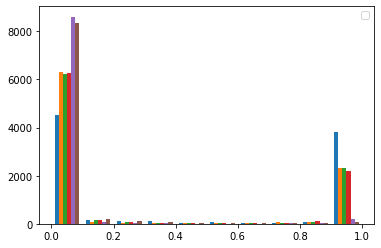

In [ ]:
plt.hist(pred);
plt.legend();

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y2[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

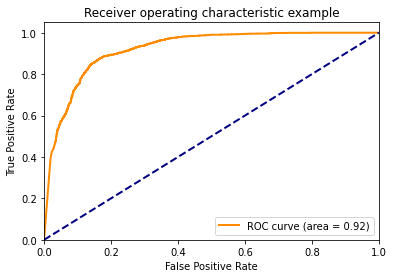

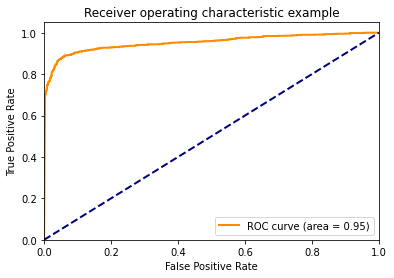

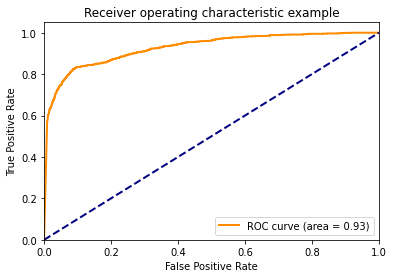

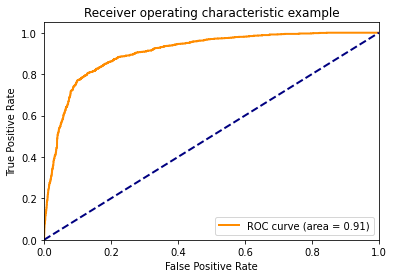

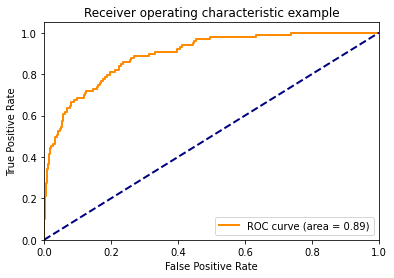

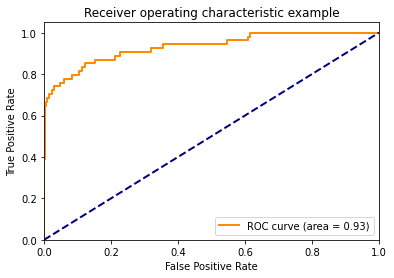

In [ ]:
for i in range(6):
  plt.figure()
  lw = 2
  plt.plot(fpr[i], tpr[i], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
for i in range(6):
  optimal_idx = np.argmax(tpr[i] - fpr[i])
  optimal_threshold = _[optimal_idx]
  print(optimal_threshold)

0.99882203
0.9999335
0.99986124
0.9982071
0.99997723
0.9999938


In [ ]:
pred = model.predict(test_tf1)
pred

array([[8.42983499e-02, 7.73892459e-03, 2.38858059e-01, 9.97526824e-01,
        7.77598645e-04, 3.25733453e-01],
       [2.78480217e-09, 1.00000000e+00, 2.70843104e-09, 1.34446572e-13,
        1.51626614e-10, 7.51375687e-14],
       [9.99999881e-01, 2.27114579e-05, 8.21606955e-04, 1.26185230e-04,
        5.52918422e-09, 6.67662448e-07],
       ...,
       [3.09853107e-01, 1.40422935e-05, 3.62046649e-06, 9.56639588e-01,
        9.98192847e-01, 1.14334143e-04],
       [1.91694626e-03, 1.14361809e-08, 1.15681053e-06, 9.99999881e-01,
        3.01287696e-06, 3.78942670e-04],
       [1.00000000e+00, 4.26387487e-06, 2.64548667e-04, 1.45481526e-05,
        1.46980900e-10, 3.78290324e-08]], dtype=float32)

In [ ]:
df = pd.DataFrame({'Computer Science': pred[:,0],'Physics':pred[:,1],'Mathematics':pred[:,2],'Statistics':pred[:,3],'Quantitative Biology':pred[:,4],'Quantitative Finance':pred[:,5]})

In [ ]:
df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,8.429835e-02,0.007739,2.388581e-01,9.975268e-01,7.775986e-04,3.257335e-01
1,2.784802e-09,1.000000,2.708431e-09,1.344466e-13,1.516266e-10,7.513757e-14
2,9.999999e-01,0.000023,8.216070e-04,1.261852e-04,5.529184e-09,6.676624e-07
3,3.647247e-21,1.000000,4.332751e-21,7.592780e-32,5.459184e-24,5.057265e-32
4,1.000000e+00,0.000005,3.654447e-04,9.580010e-06,1.048112e-10,3.011004e-08


In [ ]:
df['Computer Science'] = np.where(df['Computer Science']>=0.28878558,1,0)
df['Physics'] = np.where(df['Physics']>=0.9915187,1,0)
df['Mathematics'] = np.where(df['Mathematics']>=0.9499238,1,0)
df['Statistics'] = np.where(df['Statistics']>=0.18575056,1,0)
df['Quantitative Biology'] = np.where(df['Quantitative Biology']>=0.99989915,1,0)
df['Quantitative Finance'] = np.where(df['Quantitative Finance']>=0.999995,1,0)

In [ ]:
df = np.where(df>=0.5,1,0)

In [ ]:
preds = np.array(df)
preds

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
preds[:,0]

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(6):
  print(accuracy_score(y2[:,i],preds[:,i]))

In [ ]:
test1 = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': preds[:,0],'Physics':preds[:,1],'Mathematics':preds[:,2],'Statistics':preds[:,3],'Quantitative Biology':preds[:,4],'Quantitative Finance':preds[:,5]})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhnnra000.csv', index=False)

#LOGISTIC REGRESSION:

In [ ]:
l = ['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']
l

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

In [ ]:
y_test.shape

(4194, 6)

In [ ]:
4194*6

25164

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

preds = []
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag', n_jobs=-1, class_weight='balanced',C=3.0)))])

for category in l:
  print('**Processing {} comments...**'.format(category))
  LogReg_pipeline.fit(X_train_tf, y_train[category])
  prediction = LogReg_pipeline.predict(X_test_tf)
  print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
  print("\n")

**Processing Computer Science comments...**
Test accuracy is 0.871244635193133


**Processing Physics comments...**


In [ ]:
len(preds[0])

8989

In [ ]:
(list(preds[0]))

In [ ]:
y_test.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.7MB/s 
ERROR: Operation cancelled by user


In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression(class_weight='balanced',C=3.0))

In [ ]:
classifier.fit(X_train_tf,y_train)

In [ ]:
pred = classifier.predict(X_test_tf)
pred

In [ ]:
y_test.head()

In [ ]:
predss = clf.predict(test_tf)
predss

8989

In [ ]:
test1 = pd.read_csv('/content/drive/My Drive/Hackathon/Janatahack Independence Day 2020 ML Hackathon/test.csv')

In [ ]:
test1.shape

(8989, 3)

In [ ]:
submit = pd.DataFrame({'ID': test1.ID, 'Computer Science': list(preds[0]),'Physics':list(preds[1]),'Mathematics':list(preds[2]),'Statistics':list(preds[3]),'Quantitative Biology':list(preds[4]),'Quantitative Finance':list(preds[5])})

In [ ]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,0,0,0,0,0,0


In [ ]:
submit.to_csv('submissionjhsgd.csv', index=False)

In [ ]:
#0.803428979640433
#0.82015145140934 --> full
#0.8234289982 --> full C=3.0

#okok


In [ ]:
dic = {'AA':['teacher','student','officer','engineer','student','lawyer','student','teacher ','doctor','engineer'],
       'A':[1,1,0,1,0,1,1,1,0,1],
       'B':[0,1,0,1,1,1,0,1,1,0],
       'C':[0,0,1,1,1,0,0,1,1,0],
       'D':[1,1,0,0,0,0,1,0,0,1],
       'E':[0,0,0,0,0,1,1,0,0,1],
       'F':[0,0,0,0,1,0,0,0,0,0]}

In [ ]:
data = pd.DataFrame(dic)
data

,AA,A,B,C,D,E,F
0,teacher,1,0,0,1,0,0
1,student,1,1,0,1,0,0
2,officer,0,0,1,0,0,0
3,engineer,1,1,1,0,0,0
4,student,0,1,1,0,0,1
5,lawyer,1,1,0,0,1,0
6,student,1,0,0,1,1,0
7,teacher,1,1,1,0,0,0
8,doctor,0,1,1,0,0,0
9,engineer,1,0,0,1,1,0


In [ ]:
class_counts = data['AA'].value_counts()
class_weights = len(class_counts)/class_counts
resampled_data = data.sample(
    n=class_counts.max()*len(class_counts),
    weights=data['AA'].map(class_weights), 
    replace=True)

In [ ]:
resampled_data

,AA,A,B,C,D,E,F
9,engineer,1,0,0,1,1,0
9,engineer,1,0,0,1,1,0
2,officer,0,0,1,0,0,0
5,lawyer,1,1,0,0,1,0
5,lawyer,1,1,0,0,1,0
8,doctor,0,1,1,0,0,0
1,student,1,1,0,1,0,0
6,student,1,0,0,1,1,0
5,lawyer,1,1,0,0,1,0
1,student,1,1,0,1,0,0
